# Challenge Set 1
Topic:        Explore MTA turnstile data <br>
Date:         10/03/2016 <br>
Name:         Travis James

**Challenge 1.1**

In [ ]:
import pandas as pd
import csv

def create_mta_dict(csv_data):
    with open(csv_data) as csvfile:
        reader = csv.reader(csvfile)
        var_titles = next(reader) #skip row with var titles
        turnstile = {} #create dictionary to build out
        for row in reader:
            header = tuple(row[:4])
            if header in turnstile:
                turnstile[header].append(row[4:])
            else:
                turnstile[header] = [row[4:]]
        return turnstile
        
mta_data = create_mta_dict('turnstile_160917.csv')

**Challenge 1.2**

In [3]:
import dateutil.parser

def create_time_series(mta):
    for item in mta: #for each list of lists in the dictionary
        for l in range(0, len(mta[item])): #for each list in the aforementioned list
            date_time = str(mta[item][l][2]) + ' ' + str(mta[item][l][3])
            entries = mta[item][l][5]
            mta[item][l] = [dateutil.parser.parse(date_time), int(entries)]
    return mta

mta_data = create_time_series(mta_data)

**Challenge 1.3**

In [4]:
def create_daily_counts(mta_ts):
    day_count = {}
    for item in mta_ts: #Gets you each list of lists
        for l in range (5, len(mta_ts[item]), 6): #By values of 6, gets you each individual list
            net_total = int(mta_ts[item][l][1]) - int(mta_ts[item][l-5][1])
            if item in day_count:
                day_count[item].append([mta_ts[item][l][0].date(), net_total])
            else:
                day_count[item] = [[mta_ts[item][l][0].date(), net_total]]
    return day_count

day_count = create_daily_counts(mta_data)

**Challenge 1.4**

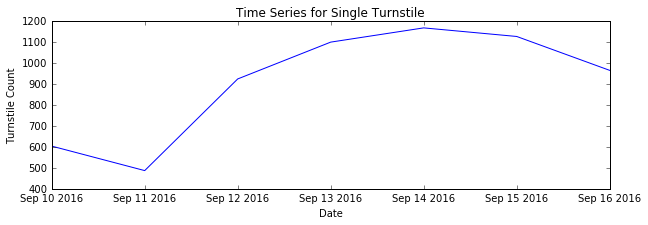

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

dates = []
counts = []
item = list(day_count.values())[-1] #grabbed last entry arbitrarily
for l in range(0, len(item)):
    dates.append(item[l][0])
    counts.append(item[l][1])

plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.xlabel('Date')
plt.ylabel('Turnstile Count')
plt.title('Time Series for Single Turnstile');

**Challenge 1.5**

In [7]:
from collections import defaultdict

def create_group_counts(day_count):
    group_count = defaultdict(lambda: defaultdict(int))
    for k, v in day_count.items():
        key = (k[0], k[1], k[3])
        for dt, count in v:
            group_count[key][dt] += count
    return group_count

group_count = create_group_counts(day_count)

**Challenge 1.6**

In [37]:
def create_station_counts(group_count): 
    station_count = defaultdict(lambda: defaultdict(int))
    for k, v in group_count.items():
        key = k[2]
        for dt, count in v.items():
            station_count[key][dt] += count
            if station_count[key][dt] < 0: #if there are erroneous negative values, set them to zero.
                station_count[key][dt] = 0
    return station_count

station_count = create_station_counts(group_count)

**Challenge 1.7**

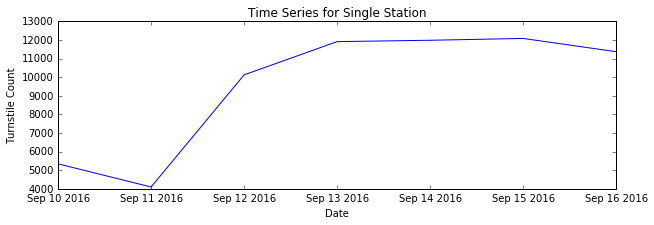

In [113]:
import collections

dates_station = []
counts_station = []
item = list(station_count.values())[0]
item = collections.OrderedDict(sorted(item.items()))
for k, v in item.items():
    dates_station.append(k)
    counts_station.append(v)
    
plt.figure(figsize=(10,3))
plt.plot(dates_station,counts_station)
plt.xlabel('Date')
plt.ylabel('Turnstile Count')
plt.title('Time Series for Single Station');

**Challenge 1.8**

In [40]:
def create_week_count(mta_csv):
    mta_data = create_mta_dict(mta_csv)
    mta_ts = create_time_series(mta_data)
    day_count = create_daily_counts(mta_ts)
    group_count = create_group_counts(day_count)
    station_count = create_station_counts(group_count)
    
    week_count_list = []
    

    item = list(station_count['111 ST'].items()) #For just one station, arbitrarily chose 111 St.
    item.sort()
    
    for v in item: 
        week_count_list.append(v[1])
    
        
    return week_count_list

In [41]:
week_count1 = create_week_count('turnstile_160827.csv')
week_count2 = create_week_count('turnstile_160903.csv')
week_count3 = create_week_count('turnstile_160910.csv')
week_count4 = create_week_count('turnstile_160917.csv')
week_count5 = create_week_count('turnstile_160924.csv')

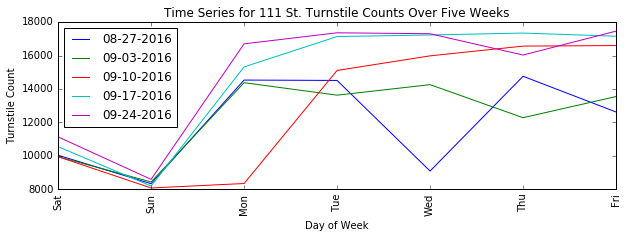

In [137]:
days_of_week = ('Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri')

plt.figure(figsize=(10,3))
plt.plot(week_count1, label = "08-27-2016")
plt.plot(week_count2, label = "09-03-2016")
plt.plot(week_count3, label = "09-10-2016")
plt.plot(week_count4, label = "09-17-2016")
plt.plot(week_count5, label = "09-24-2016")
plt.xlabel('Day of Week')
plt.ylabel('Turnstile Count')
plt.title('Time Series for 111 St. Turnstile Counts Over Five Weeks')
plt.xticks(range(7), days_of_week, rotation = 90)
plt.legend(loc = 2);

**Challenge 1.9**

In [43]:
def total_ridership(mta_csv):
    mta_data = create_mta_dict(mta_csv)
    mta_ts = create_time_series(mta_data)
    day_count = create_daily_counts(mta_ts)
    group_count = create_group_counts(day_count)
    station_count = create_station_counts(group_count)
    
    weekly_ridership = defaultdict(int)
    
    for station, days in station_count.items():
        for dt, count in days.items():
            weekly_ridership[station] += count
    
    return weekly_ridership
    

In [44]:
weekly_count1 = total_ridership('turnstile_160827.csv')
weekly_count2 = total_ridership('turnstile_160903.csv')
weekly_count3 = total_ridership('turnstile_160910.csv')
weekly_count4 = total_ridership('turnstile_160917.csv')
weekly_count5 = total_ridership('turnstile_160924.csv')

In [62]:
def multi_week_ridership(week1, additional_weeks):
    total_count = week1
    for week in additional_weeks:
        for station, count in week.items():
            total_count[station] += count
    return total_count

other_weeks = [weekly_count2, weekly_count3, weekly_count4, weekly_count5]

total_count = multi_week_ridership(weekly_count1, other_weeks)


In [85]:
df = pd.DataFrame([col1, col2] for col1, col2 in total_count.items())
df.columns = ["Station", "Count"]

In [87]:
df_sorted = df.sort_values(by = "Count")

In [100]:
df_sorted = df_sorted[df_sorted.Count < 100000000]

**Challenge 1.10**

In [101]:
total_ridership_counts = df_sorted["Count"].tolist()

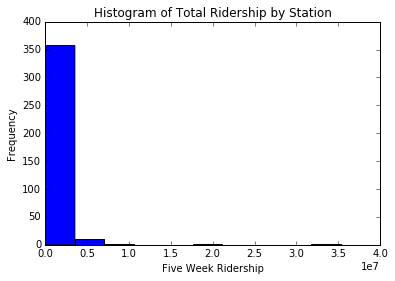

In [130]:
plt.hist(total_ridership_counts)
plt.xlabel('Five Week Ridership')
plt.ylabel('Frequency')
plt.title('Histogram of Total Ridership by Station');

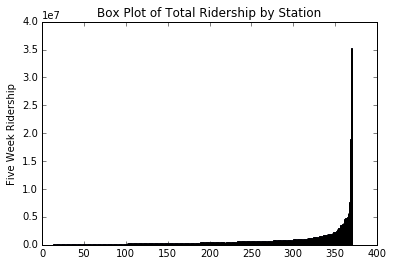

In [135]:
indices = range(len(total_ridership_counts))
plt.bar(indices, total_ridership_counts)
plt.xlabel('')
plt.ylabel('Five Week Ridership')
plt.title('Box Plot of Total Ridership by Station');